<a href="https://colab.research.google.com/github/kazirafi71/Thesis/blob/master/BiGru_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:

import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import classification_report

In [39]:
pip install --upgrade tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional,GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import keras
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.optimizers import SGD

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df=pd.read_csv('/content/drive/MyDrive/CV Sorting Project/UpdatedResumeDataSet.csv')
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [46]:
df=pd.read_csv('/content/drive/MyDrive/CV Sorting Project/UpdatedResumeDataSet.csv')
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [47]:
# remove the URLs, hashtags, mentions, special letters, and punctuations

import re

def clean(text):
    
    
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

df['clean text']=df.Resume.apply(lambda x: clean(x))

In [48]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

df.head(10)


,Category,Resume,clean text
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skills Python Tableau Data Visuali...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,Education Details B Tech Rayat and Bahra Insti...
8,6,Personal Skills â¢ Ability to quickly grasp t...,Personal Skills Ability to quickly grasp t...
9,6,Expertise â Data and Quantitative Analysis â...,Expertise Data and Quantitative Analysis ...


In [49]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
#nltk
import nltk

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# BeautifulSoup libraray
from bs4 import BeautifulSoup 

import re # regex

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
# from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
 
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer

from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

#gensim w2v
#word2vec
from gensim.models import Word2Vec

In [50]:
# function to clean and pre-process the text.
def clean_reviews(review):  
    
    # 1. Removing html tags
    review_text = BeautifulSoup(review,"lxml").get_text()
    
    # 2. Retaining only alphabets.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()
    
    # 4. Remove stopwords
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english"))     
    word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    
    cleaned_review=" ".join(word_tokens)
    return cleaned_review

In [51]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences=[]
sum=0
for review in df['clean text']:
    sents=tokenizer.tokenize(review.strip())
    sum+=len(sents)
    for sent in sents:
        cleaned_sent=clean_reviews(sent)
        sentences.append(cleaned_sent.split()) # can use word_tokenize also.
print(sum)
print(len(sentences))  # total no of sentences

962
962


In [52]:
# trying to print few sentences
for te in sentences[:5]:
    print(te,"\n")

['skill', 'programming', 'language', 'python', 'panda', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'sql', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'svm', 'na', 'bayes', 'knn', 'random', 'forest', 'decision', 'tree', 'boosting', 'technique', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'lda', 'nmf', 'pca', 'neural', 'net', 'database', 'visualization', 'mysql', 'sqlserver', 'cassandra', 'hbase', 'elasticsearch', 'j', 'dc', 'j', 'plotly', 'kibana', 'matplotlib', 'ggplot', 'tableau', 'others', 'regular', 'expression', 'html', 'cs', 'angular', 'logstash', 'kafka', 'python', 'flask', 'git', 'docker', 'computer', 'vision', 'open', 'cv', 'understanding', 'deep', 'learning', 'education', 'detail', 'data', 'science', 'assurance', 'associate', 'data', 'science', 'assurance', 'associate', 'ernst', 'young', 'llp', 'skill', 'detail', 'javascript', 'exp

In [53]:
import gensim
w2v_model=gensim.models.Word2Vec(sentences=sentences,size=100,window=10,min_count=1)
w2v_model.train(sentences,epochs=10,total_examples=len(sentences))

(2770787, 3045240)

In [54]:
# total numberof extracted words.
vocab=w2v_model.wv.vocab
print("The total number of words are : ",len(vocab))
print("The no of words :",len(vocab))

# print(vocab)
vocab=list(vocab.keys())

The total number of words are :  6386
The no of words : 6386


In [55]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size

The no of key-value pairs :  6386


In [56]:
# cleaning reviews.
df['clean_res']=df['Resume'].apply(clean_reviews)
df

,Category,Resume,clean text,clean_res
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,skill programming language python panda numpy ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,education detail may may b e uit rgpv data sci...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,area interest deep learning control system des...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...,skill r python sap hana tableau sap hana sql s...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,education detail mca ymcaust faridabad haryana...
...,...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Wo...,computer skill proficient m office word basic ...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Po...,willingness accept challenge positive thinking...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagernes...,personal skill quick learner eagerness learn n...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...,computer skill software knowledge m power poin...


In [57]:
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

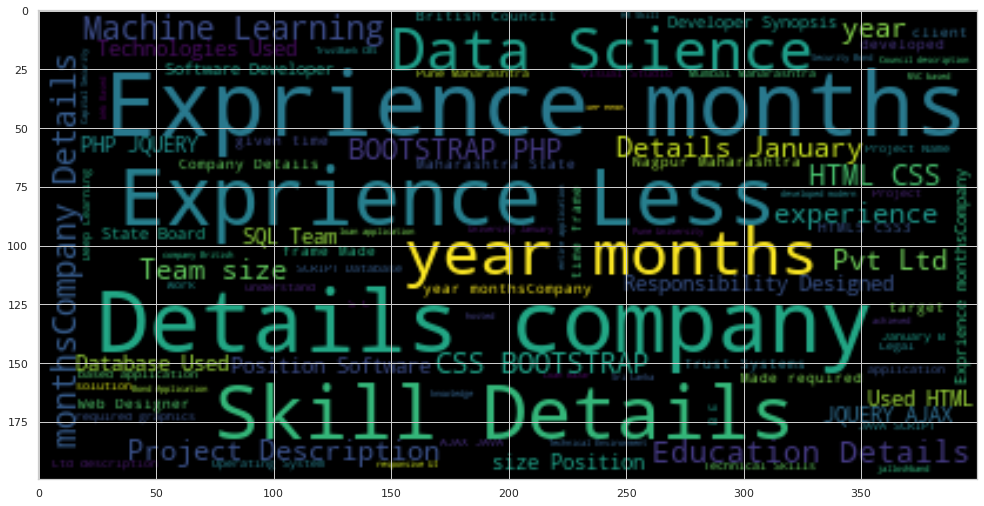

In [58]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

# print(most_common)
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

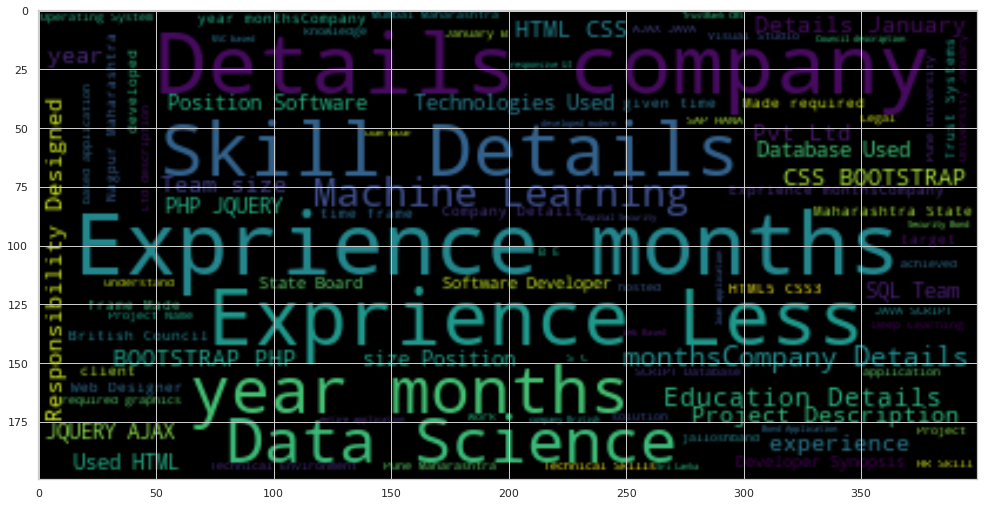

In [59]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['clean text'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

# print(most_common)
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

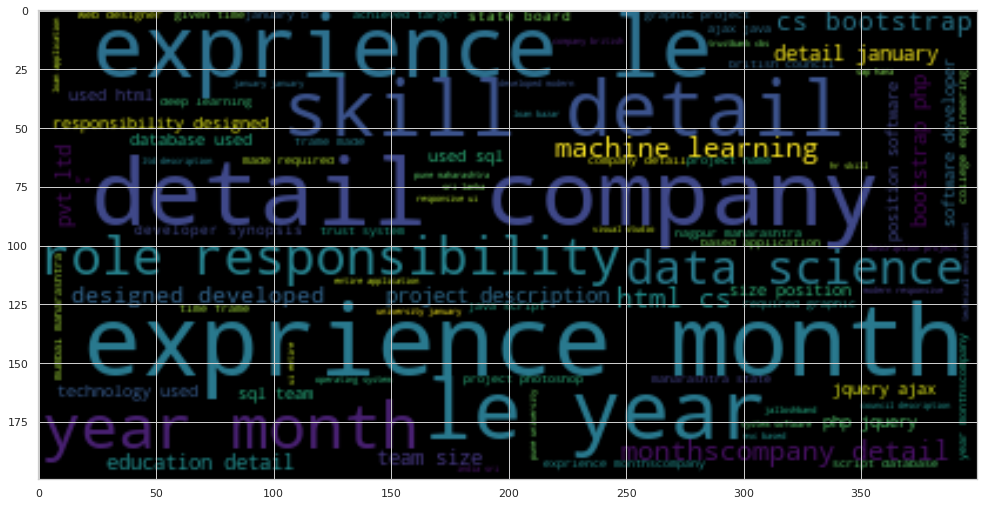

In [60]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['clean_res'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

# print(most_common)
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

In [61]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

df.head(10)


,Category,Resume,clean text,clean_res
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,skill programming language python panda numpy ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,education detail may may b e uit rgpv data sci...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,area interest deep learning control system des...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...,skill r python sap hana tableau sap hana sql s...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,education detail mca ymcaust faridabad haryana...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...,skill c basic iot python matlab data science m...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skills Python Tableau Data Visuali...,skill python tableau data visualization r stud...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,Education Details B Tech Rayat and Bahra Insti...,education detail b tech rayat bahra institute ...
8,6,Personal Skills â¢ Ability to quickly grasp t...,Personal Skills Ability to quickly grasp t...,personal skill ability quickly grasp technical...
9,6,Expertise â Data and Quantitative Analysis â...,Expertise Data and Quantitative Analysis ...,expertise data quantitative analysis decision ...


In [62]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# text=df['clean text'].values
text=df['clean_res'].values
terget=df['Category'].values



vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=250)

vect.fit(text)

Word_feature=vect.transform(text)

print(Word_feature.shape)

(962, 250)


In [63]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# tokenizer.fit_on_texts(df['clean text'].values)
tokenizer.fit_on_texts(df['clean_res'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6384 unique tokens.


In [64]:
# X = tokenizer.texts_to_sequences(df['clean text'].values)
X = tokenizer.texts_to_sequences(df['clean_res'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of df tensor:', X.shape)

Shape of df tensor: (962, 250)


In [65]:
Y = pd.get_dummies(df['Category']).values
print('Shape of Category tensor:', Y.shape)

Shape of Category tensor: (962, 25)


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30,random_state=42)
print(Y_train)
print(X_test.shape,Y_test.shape)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(289, 250) (289, 25)


In [67]:
# BiGRU model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, dropout=0.5)))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 25s 736ms/step - loss: 3.1750 - accuracy: 0.0860 - val_loss: 3.1390 - val_accuracy: 0.0441
Epoch 2/20
21/21 [==============================] - 13s 620ms/step - loss: 2.9964 - accuracy: 0.1769 - val_loss: 3.0558 - val_accuracy: 0.1029
Epoch 3/20
21/21 [==============================] - 13s 619ms/step - loss: 2.7507 - accuracy: 0.2992 - val_loss: 2.9807 - val_accuracy: 0.1912
Epoch 4/20
21/21 [==============================] - 13s 628ms/step - loss: 2.4027 - accuracy: 0.4149 - val_loss: 2.3930 - val_accuracy: 0.2353
Epoch 5/20
21/21 [==============================] - 13s 619ms/step - loss: 1.7474 - accuracy: 0.5289 - val_loss: 1.8601 - val_accuracy: 0.5147
Epoch 6/20
21/21 [==============================] - 13s 631ms/step - loss: 1.2845 - accuracy: 0.7074 - val_loss: 1.4986 - val_accuracy: 0.7353
Epoch 7/20
21/21 [==============================] - 14s 681ms/step - loss: 1.0091 - accuracy: 0.8066 - val_loss: 1.1416 - val_accuracy: 0.7647

10/10 [==============================] - 2s 92ms/step


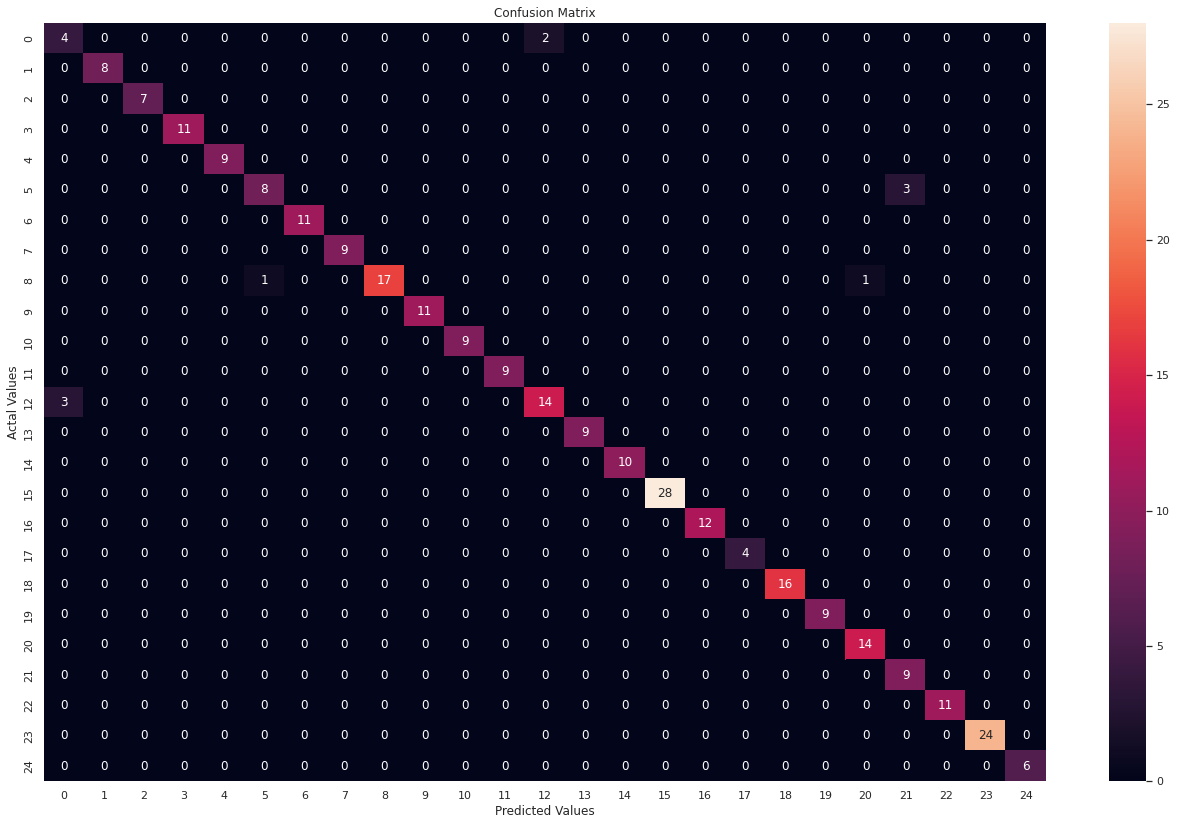

In [68]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,13))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

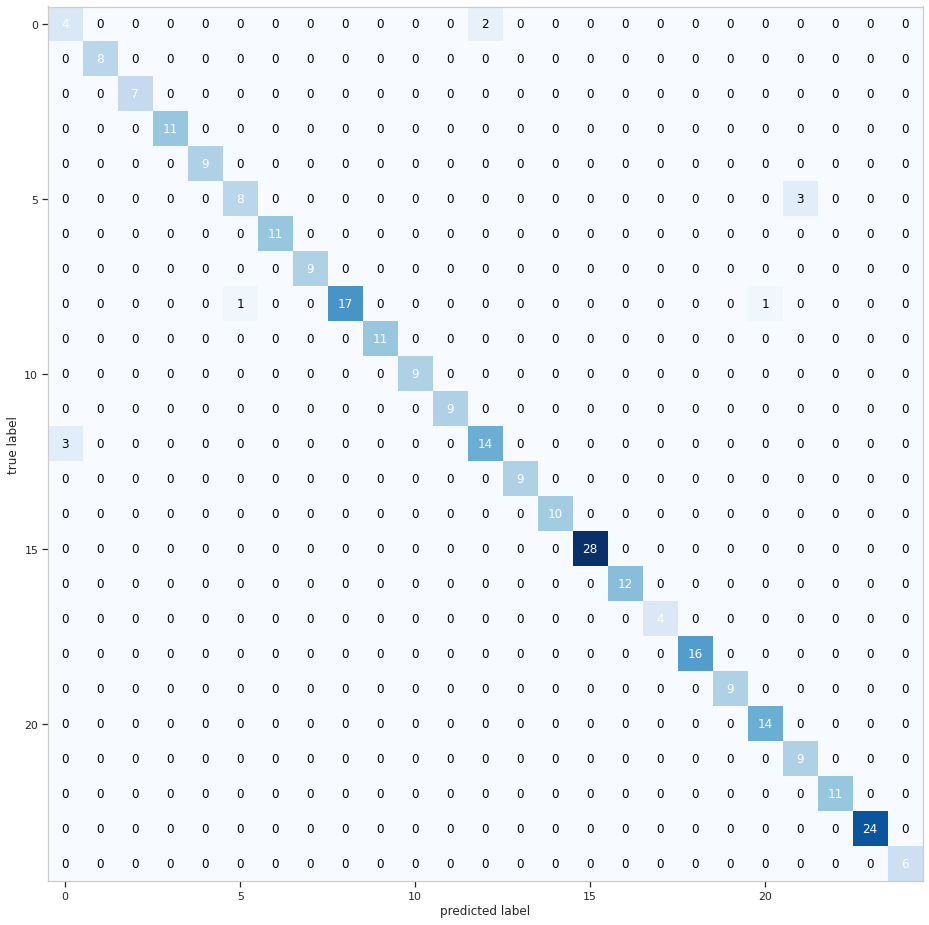

In [69]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,15),
                                cmap='Blues',
                                hide_ticks=False,
                                colorbar=False,
                                show_absolute=True,
                                show_normed=False)
plt.show()


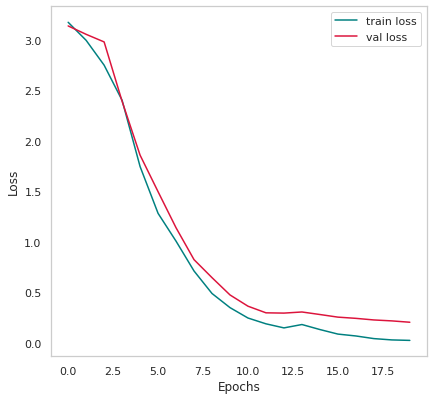

In [70]:


# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


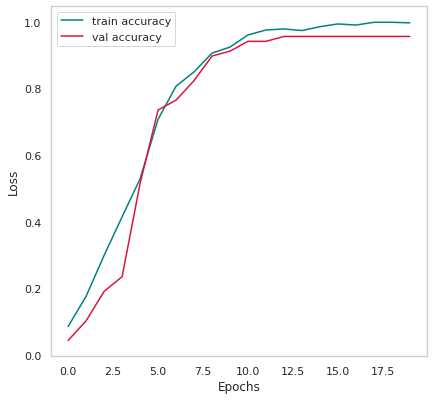

In [71]:
#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [72]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test) 
val_preds = np.argmax(y_pred, axis=1)
val_preds

val_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, val_pred))

10/10 [==============================] - 1s 90ms/step
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         9
           5       0.89      0.73      0.80        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       0.88      0.82      0.85        17
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        28
          16       1.00    

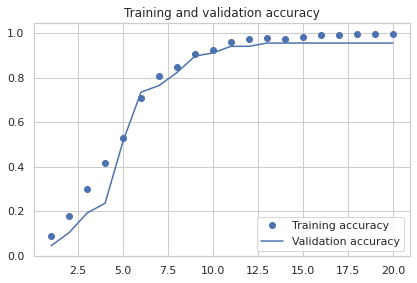

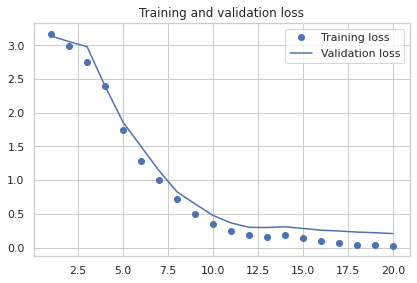

In [73]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [74]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

10/10 [==============================] - 1s 92ms/step - loss: 0.1911 - accuracy: 0.9654
Test set
  Loss: 0.191
  Accuracy: 0.965


In [75]:
# Tuning starts

In [76]:
# BiGRU model
# chnage activation function

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, dropout=0.5)))
model.add(Dense(25, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 18s 645ms/step - loss: 3.1778 - accuracy: 0.0942 - val_loss: 3.1517 - val_accuracy: 0.0882
Epoch 2/20
21/21 [==============================] - 15s 730ms/step - loss: 3.0085 - accuracy: 0.1537 - val_loss: 3.0572 - val_accuracy: 0.2059
Epoch 3/20
21/21 [==============================] - 14s 667ms/step - loss: 2.7716 - accuracy: 0.2397 - val_loss: 2.8563 - val_accuracy: 0.1912
Epoch 4/20
21/21 [==============================] - 13s 615ms/step - loss: 2.4120 - accuracy: 0.3785 - val_loss: 2.4219 - val_accuracy: 0.3235
Epoch 5/20
21/21 [==============================] - 13s 613ms/step - loss: 1.8936 - accuracy: 0.4744 - val_loss: 2.0338 - val_accuracy: 0.5882
Epoch 6/20
21/21 [==============================] - 13s 624ms/step - loss: 1.4121 - accuracy: 0.6760 - val_loss: 1.4998 - val_accuracy: 0.6618
Epoch 7/20
21/21 [==============================] - 13s 617ms/step - loss: 0.9949 - accuracy: 0.7835 - val_loss: 1.1421 - val_accuracy: 0.7353

10/10 [==============================] - 1s 94ms/step - loss: 0.1868 - accuracy: 0.9792
Test set
  Loss: 0.187
  Accuracy: 0.979


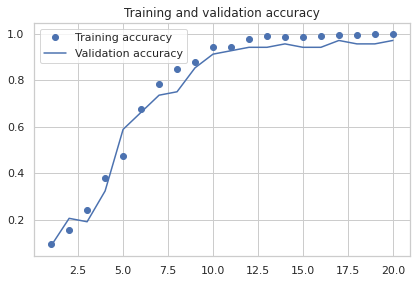

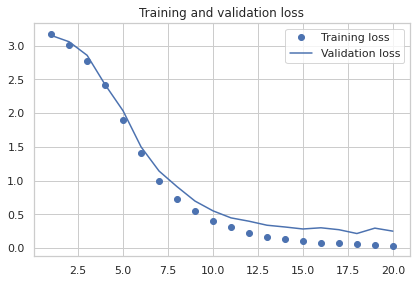

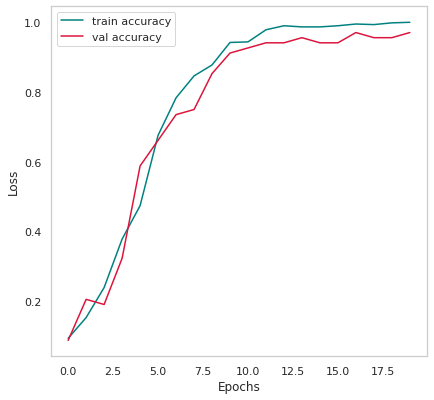

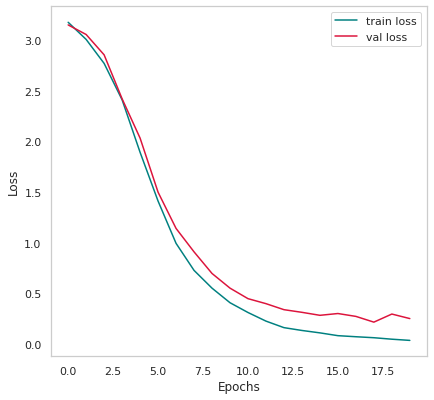

In [77]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))



import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [78]:
# BiGRU model
# chnage learning rate

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, dropout=0.5)))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 19s 684ms/step - loss: 2.8093 - accuracy: 0.2413 - val_loss: 2.2937 - val_accuracy: 0.4118
Epoch 2/20
21/21 [==============================] - 13s 641ms/step - loss: 1.1126 - accuracy: 0.7091 - val_loss: 0.6056 - val_accuracy: 0.8235
Epoch 3/20
21/21 [==============================] - 13s 630ms/step - loss: 0.2488 - accuracy: 0.9355 - val_loss: 0.1946 - val_accuracy: 0.9706
Epoch 4/20
21/21 [==============================] - 14s 645ms/step - loss: 0.0848 - accuracy: 0.9835 - val_loss: 0.1113 - val_accuracy: 0.9706
Epoch 5/20
21/21 [==============================] - 13s 631ms/step - loss: 0.0362 - accuracy: 0.9917 - val_loss: 0.0906 - val_accuracy: 0.9706
Epoch 6/20
21/21 [==============================] - 13s 643ms/step - loss: 0.0319 - accuracy: 0.9934 - val_loss: 0.1336 - val_accuracy: 0.9853
Epoch 7/20
21/21 [==============================] - 13s 636ms/step - loss: 0.0198 - accuracy: 0.9967 - val_loss: 0.1019 - val_accuracy: 0.9706

10/10 [==============================] - 1s 92ms/step - loss: 0.1256 - accuracy: 0.9723
Test set
  Loss: 0.126
  Accuracy: 0.972


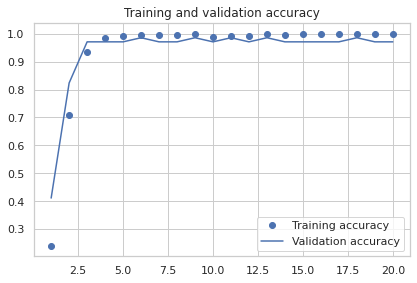

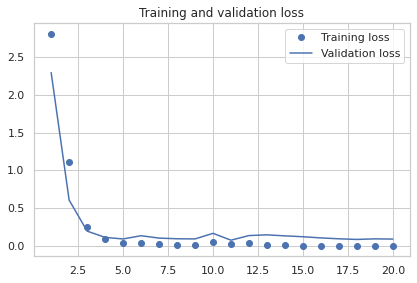

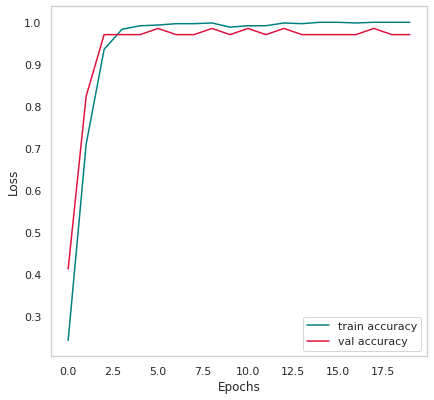

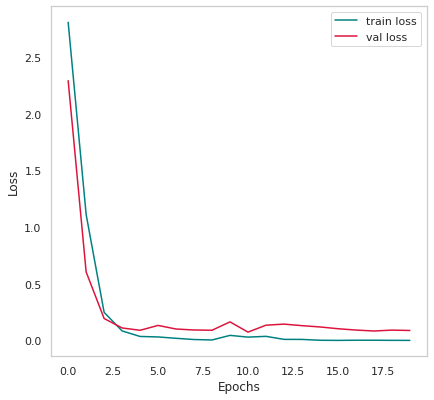

In [79]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))



import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [80]:
# BiGRU model
# change epoch

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, dropout=0.5)))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



epochs = 50
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/50
21/21 [==============================] - 18s 656ms/step - loss: 3.1803 - accuracy: 0.1190 - val_loss: 3.1551 - val_accuracy: 0.1471
Epoch 2/50
21/21 [==============================] - 13s 633ms/step - loss: 2.9987 - accuracy: 0.2165 - val_loss: 3.1276 - val_accuracy: 0.1471
Epoch 3/50
21/21 [==============================] - 13s 635ms/step - loss: 2.8054 - accuracy: 0.2810 - val_loss: 2.9632 - val_accuracy: 0.1912
Epoch 4/50
21/21 [==============================] - 15s 741ms/step - loss: 2.3504 - accuracy: 0.3455 - val_loss: 2.3616 - val_accuracy: 0.2647
Epoch 5/50
21/21 [==============================] - 13s 634ms/step - loss: 1.8406 - accuracy: 0.4645 - val_loss: 1.9880 - val_accuracy: 0.3676
Epoch 6/50
21/21 [==============================] - 13s 624ms/step - loss: 1.4638 - accuracy: 0.6446 - val_loss: 1.5855 - val_accuracy: 0.5735
Epoch 7/50
21/21 [==============================] - 13s 640ms/step - loss: 1.0630 - accuracy: 0.7702 - val_loss: 1.1432 - val_accuracy: 0.6912

10/10 [==============================] - 1s 91ms/step - loss: 0.1586 - accuracy: 0.9723
Test set
  Loss: 0.159
  Accuracy: 0.972


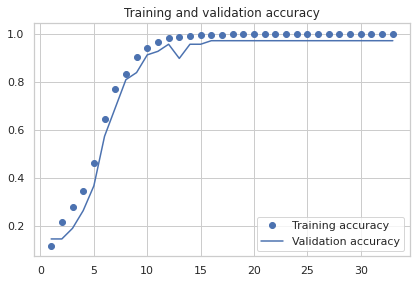

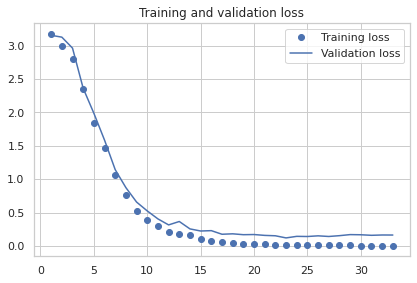

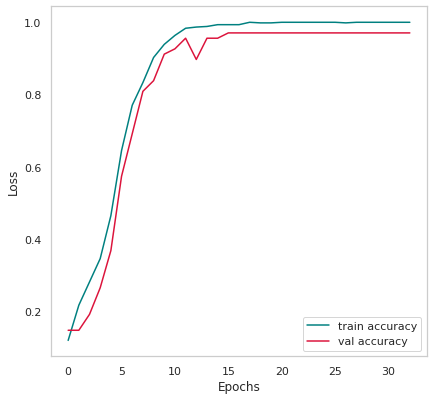

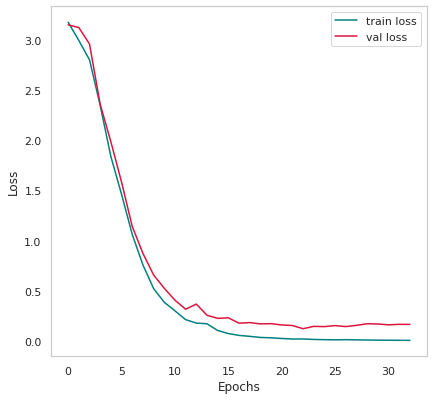

In [81]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))



import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()